# Unlocking Potential: Modeling Transferability and Future Performance of D1 Athletes

#### Statement of the Problem We are Addressing

The problem we are addressing revolves around assessing the potential transferability of basketball players to the Division 1 UCSD basketball team. Succesfully recruiting basketball players for a college team can be very challenging. Evaluating a player's skill set, such as shooting, offense, defense, and teamwork, requires comprehensive knowledge and experience from the recruiters. Limited scouting resources, uncertainties regarding long-term development, and competition from other colleges make the recruitment process highly competitive and prone to errors. By leveraging past statistics of both the players under consideration and those who have successfully transitioned to D1 teams, we aim to develop a predictive model that can be used to ease these concerns. This model will help evaluate the suitability of prospective transfers based on their performance metrics, thereby aiding in the selection process and ensuring that the chosen players are a good fit for the team.

#### Source of the Data

The data used for recruitment was obtained by scraping information from individual team websites for both D1 and D2 colleges. This included gathering data from each team's roster as well as individual player statistics. The process involved navigating through multiple URL schemes to accommodate various types of websites.

Here is an example of a website containing the data we are interested in scraping: https://ucsdtritons.com/sports/mens-basketball/stats/2022-23

The scraping notebook is stored separately for easier and faster access. The resulting datasets are shown below.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")
data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,202,8.8,68,24,61,21,6,F,Academy of Art University,2018-2019
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,40,1.4,51,22,34,13,1,G,Academy of Art University,2018-2019
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,3,0.2,7,6,1,2,0,G,Academy of Art University,2018-2019
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,86,3.7,56,28,28,22,2,G,Academy of Art University,2018-2019
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,36,1.3,62,91,62,26,1,G,Academy of Art University,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15638,Ahmir Crum,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023
15639,Alfonzo Hilliard,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023
15640,Avery Jones,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023
15641,Griffin Neville,0,0,0,0.0,0,0,0.000,0,0,...,0,0.0,0,0,0,0,0,G,Young Harris College,2022-2023


In [3]:
d1_data = pd.read_csv("d1data.csv")
d1_data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Jaylen Franklin,1,1,30,30.0,5,9,0.556,0,1,...,8,8.0,3,1,4,1,0,G,Abilene Christian University,2018-2019
1,Jaren Lewis,1,1,31,31.0,5,13,0.385,4,8,...,1,1.0,1,3,2,1,0,F,Abilene Christian University,2018-2019
2,Damien Daniels,1,1,31,31.0,3,9,0.333,2,7,...,2,2.0,0,1,0,0,1,G,Abilene Christian University,2018-2019
3,Payten Ricks,23,23,503,21.9,113,239,0.473,29,77,...,107,4.7,71,22,46,16,22,G,Abilene Christian University,2018-2019
4,Tobias Cameron,33,8,504,15.3,25,61,0.410,16,36,...,40,1.2,47,20,18,14,1,G,Abilene Christian University,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,18,0.8,18,6,8,3,1,G,University of California – Santa Barbara,2022-2023
11148,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,1,0.3,1,0,0,0,0,F,University of California – Santa Barbara,2022-2023
11149,Gage Gomez,10,0,18,1.8,0,2,0.000,0,1,...,2,0.2,0,2,1,0,0,G,University of California – Santa Barbara,2022-2023
11150,Henry Hartwell,2,0,4,2.0,0,1,0.000,0,1,...,1,0.5,0,0,1,0,0,G,University of California – Santa Barbara,2022-2023


In [4]:
schools = pd.read_csv("d2_basketball_schools.csv")
schools

,Name,Conference,Division,Reclass Division,Public/Private,HBCU,State
0,Academy of Art University,Pacific West Conference,II,NaN,Private,No,CA
1,Adams State University,Rocky Mountain Athletic Conference,II,NaN,Public,No,CO
2,Adelphi University,Northeast-10 Conference,II,NaN,Private,No,NY
3,Albany State University (Georgia),Southern Intercol. Ath. Conf.,II,NaN,Public,Yes,GA
4,Allen University,Southern Intercol. Ath. Conf.,II,NaN,Private,Yes,SC
...,...,...,...,...,...,...,...
309,Wilmington University (Delaware),Central Atlantic Collegiate Conference,II,NaN,Private,No,DE
310,Wingate University,South Atlantic Conference,II,NaN,Private,No,NC
311,Winona State University,Northern Sun Intercollegiate Conference,II,NaN,Public,No,MN
312,Winston-Salem State University,Central Intercollegiate Athletic Association,II,NaN,Public,Yes,NC


In [5]:
d1_schools = pd.read_excel("division1schools.xlsx")
d1_schools

,Conference,Division,School
0,Western Athletic Conference,NCAA D1,Abilene Christian University
1,Southwestern Athletic Conference,NCAA D1,Alabama A&M University
2,Southwestern Athletic Conference,NCAA D1,Alabama State University
3,Southwestern Athletic Conference,NCAA D1,Alcorn State University
4,Patriot League,NCAA D1,American University
...,...,...,...
358,Southern Conference,NCAA D1,Wofford College
359,Horizon League,NCAA D1,Wright State University
360,Big East Conference,NCAA D1,Xavier University
361,Ivy League,NCAA D1,Yale University


#### Description of the Data

Our data includes statistics on basketball player performance. Each row represents an observation for the performance of one player during a game. The quantitative metrics are GP, GS, MIN, MIN/G, FGM, FGA, FG%, 3PT, 3PTA, 3PT%, FT, FTA, FT%, PTS, AVG, OFF REB, DEF REB, REB, REB/G, PF, AST, TO, STL, BLK, and Year. The categorical metrics are Position and Team. A summary of these variables is provided below:

**GP:** Games Played  
**GS:** Games Started  
**MIN:** Minutes Played  
**FGM:** Field Goals Made  
**FGA:** Field Goals Attempted  
**FG%:** Field Goals Percentage  
**FTM:** Free Throws Made  
**FTA:** Free Throws Attempted  
**FT%:** Free Throws Percentage  
**3PT:** Three-Point Field Goals Made  
**3PTA:** Three-Point Field Goals Attempted  
**3PT%:** Three-Point Field Goals Percentage  
**REB:** Rebounds  
**OFF REB:** Offensive Rebounds  
**DEF REB:** Defensive Rebounds  
**PF:** Personal Fouls  
**AST:** Assists  
**STL:** Steals  
**BLK:** Blocks  
**TO:** Turnovers  
**Position:** Basketball Position  
**Team:** College Team Player is Affiliated with  
**Year:** Year of the game

In [6]:
# Data Cleaning 
data.isnull().sum()
# Check how many rows have most of their entries as zeros 
zeros_per_row = (data == 0).sum(axis=1)
# Check how many rows have more than half of the columns are zero (> 14 columns)
(zeros_per_row > 14).sum()
# Drop these rows 
data = data.loc[zeros_per_row <= 14]
data.shape #(13028, 28)

(13028, 28)

In [7]:
# Data Cleaning 
d1_data.isnull().sum()
# Check how many rows have most of their entries as zeros 
zeros_per_row2 = (d1_data == 0).sum(axis=1)
# Check how many rows have more than half of the columns are zero (> 14 columns)
(zeros_per_row2 > 14).sum()
# Drop these rows 
d1_data = d1_data.loc[zeros_per_row <= 14]
d1_data.shape #(9303, 28)

(9303, 28)

After cleaning that shape of the data becomes (13028, 28) for d2 schools and (9303, 28) for d1 schools.

#### Exploratory Data Analysis

Since the data for D1 schools has the same format as D2 schools, we will only explore one dataset, the D2 dataset.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data.head()

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,202,8.8,68,24,61,21,6,F,Academy of Art University,2018-2019
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,40,1.4,51,22,34,13,1,G,Academy of Art University,2018-2019
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,3,0.2,7,6,1,2,0,G,Academy of Art University,2018-2019
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,86,3.7,56,28,28,22,2,G,Academy of Art University,2018-2019
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,36,1.3,62,91,62,26,1,G,Academy of Art University,2018-2019


In [10]:
data.columns

Index(['Player', 'GP', 'GS', 'MIN', 'MIN/G', 'FGM', 'FGA', 'FG%', '3PT',
       '3PTA', '3PT%', 'FT', 'FTA', 'FT%', 'PTS', 'AVG', 'OFF REB', 'DEF REB',
       'REB', 'REB/G', 'PF', 'AST', 'TO', 'STL', 'BLK', 'Position', 'Team',
       'Year'],
      dtype='object')

In [11]:
data["Position"].value_counts()

Position
G                                                             7466
F                                                             3983
G/F                                                            609
C                                                              455
F/C                                                            177
Point                                                           75
PG                                                              49
W                                                               43
Wing                                                            28
F/G                                                             28
Shooting                                                        24
GUARD                                                           13
Small                                                           10
Power                                                           10
P                                                    

There are a lot of different positions in our dataset, but normally in Basketball there are only three main positions (Forward, Center, and Guard) and five sub-positions (Point Guard, Shooting Guard, Small Forward, Power Forward, and Center). To keep our data consistent, we will only look at the three main positions.

In [12]:
def correct_positions(position):
    if position[0] == "g" or position in ["pg", "point", "w", "wing", "shooting", "sg"]:
        return 'Guard'
    elif position[0] == "f" or position in ["small", "power", "pf/c", "sf", "w/f", "pf", "wing/f"]:
        return "Forward"
    elif position[0] == "c":
        return "Center"
    else:
        return "Other"

In [13]:
corrected_positions = ["Center", "Guard", "Forward"]
data_new = data.assign(Position=data["Position"].apply(lambda x: x.strip('`').strip().lower()).apply(correct_positions))
data_new.head()

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,202,8.8,68,24,61,21,6,Forward,Academy of Art University,2018-2019
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,40,1.4,51,22,34,13,1,Guard,Academy of Art University,2018-2019
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,3,0.2,7,6,1,2,0,Guard,Academy of Art University,2018-2019
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,86,3.7,56,28,28,22,2,Guard,Academy of Art University,2018-2019
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,36,1.3,62,91,62,26,1,Guard,Academy of Art University,2018-2019


In [14]:
data_new["Position"].value_counts()

Position
Guard      8320
Forward    4227
Center      464
Other        17
Name: count, dtype: int64

We can also take a look at the distributions of our quantitative variables by using describe to get a better sense of our data.

In [15]:
data_new.describe()

,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,3PT%,...,AVG,OFF REB,DEF REB,REB,REB/G,PF,AST,TO,STL,BLK
count,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,20.516656,10.343798,416.488103,17.946016,56.304882,124.298895,0.434745,16.571001,46.944351,0.278392,...,6.641641,18.032238,49.756601,67.788916,2.918115,35.401213,28.181072,26.498618,13.769496,5.943583
std,8.886287,11.079492,310.976436,10.070180,52.418223,110.226531,0.131556,20.301484,52.673202,0.178376,...,5.124766,19.029687,43.882920,59.963521,2.090660,25.164956,31.525513,22.622513,13.506208,8.996641
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,126.000000,8.900000,12.000000,29.000000,0.375000,1.000000,5.000000,0.182000,...,2.300000,4.000000,13.000000,18.000000,1.300000,13.000000,5.000000,7.000000,3.000000,0.000000
50%,23.000000,6.000000,377.000000,17.900000,42.000000,97.000000,0.436000,8.000000,27.000000,0.316000,...,5.500000,12.000000,40.000000,55.000000,2.600000,34.000000,18.000000,22.000000,10.000000,3.000000
75%,28.000000,20.000000,666.000000,26.800000,87.000000,193.000000,0.500000,26.000000,74.000000,0.382000,...,10.000000,26.000000,75.000000,101.250000,4.100000,54.000000,41.000000,40.000000,21.000000,8.000000
max,39.000000,39.000000,1472.000000,40.200000,343.000000,650.000000,1.000000,168.000000,405.000000,1.000000,...,32.000000,151.000000,299.000000,398.000000,14.500000,129.000000,261.000000,174.000000,126.000000,131.000000


In order to visualize this we can use boxplots!

<Axes: >

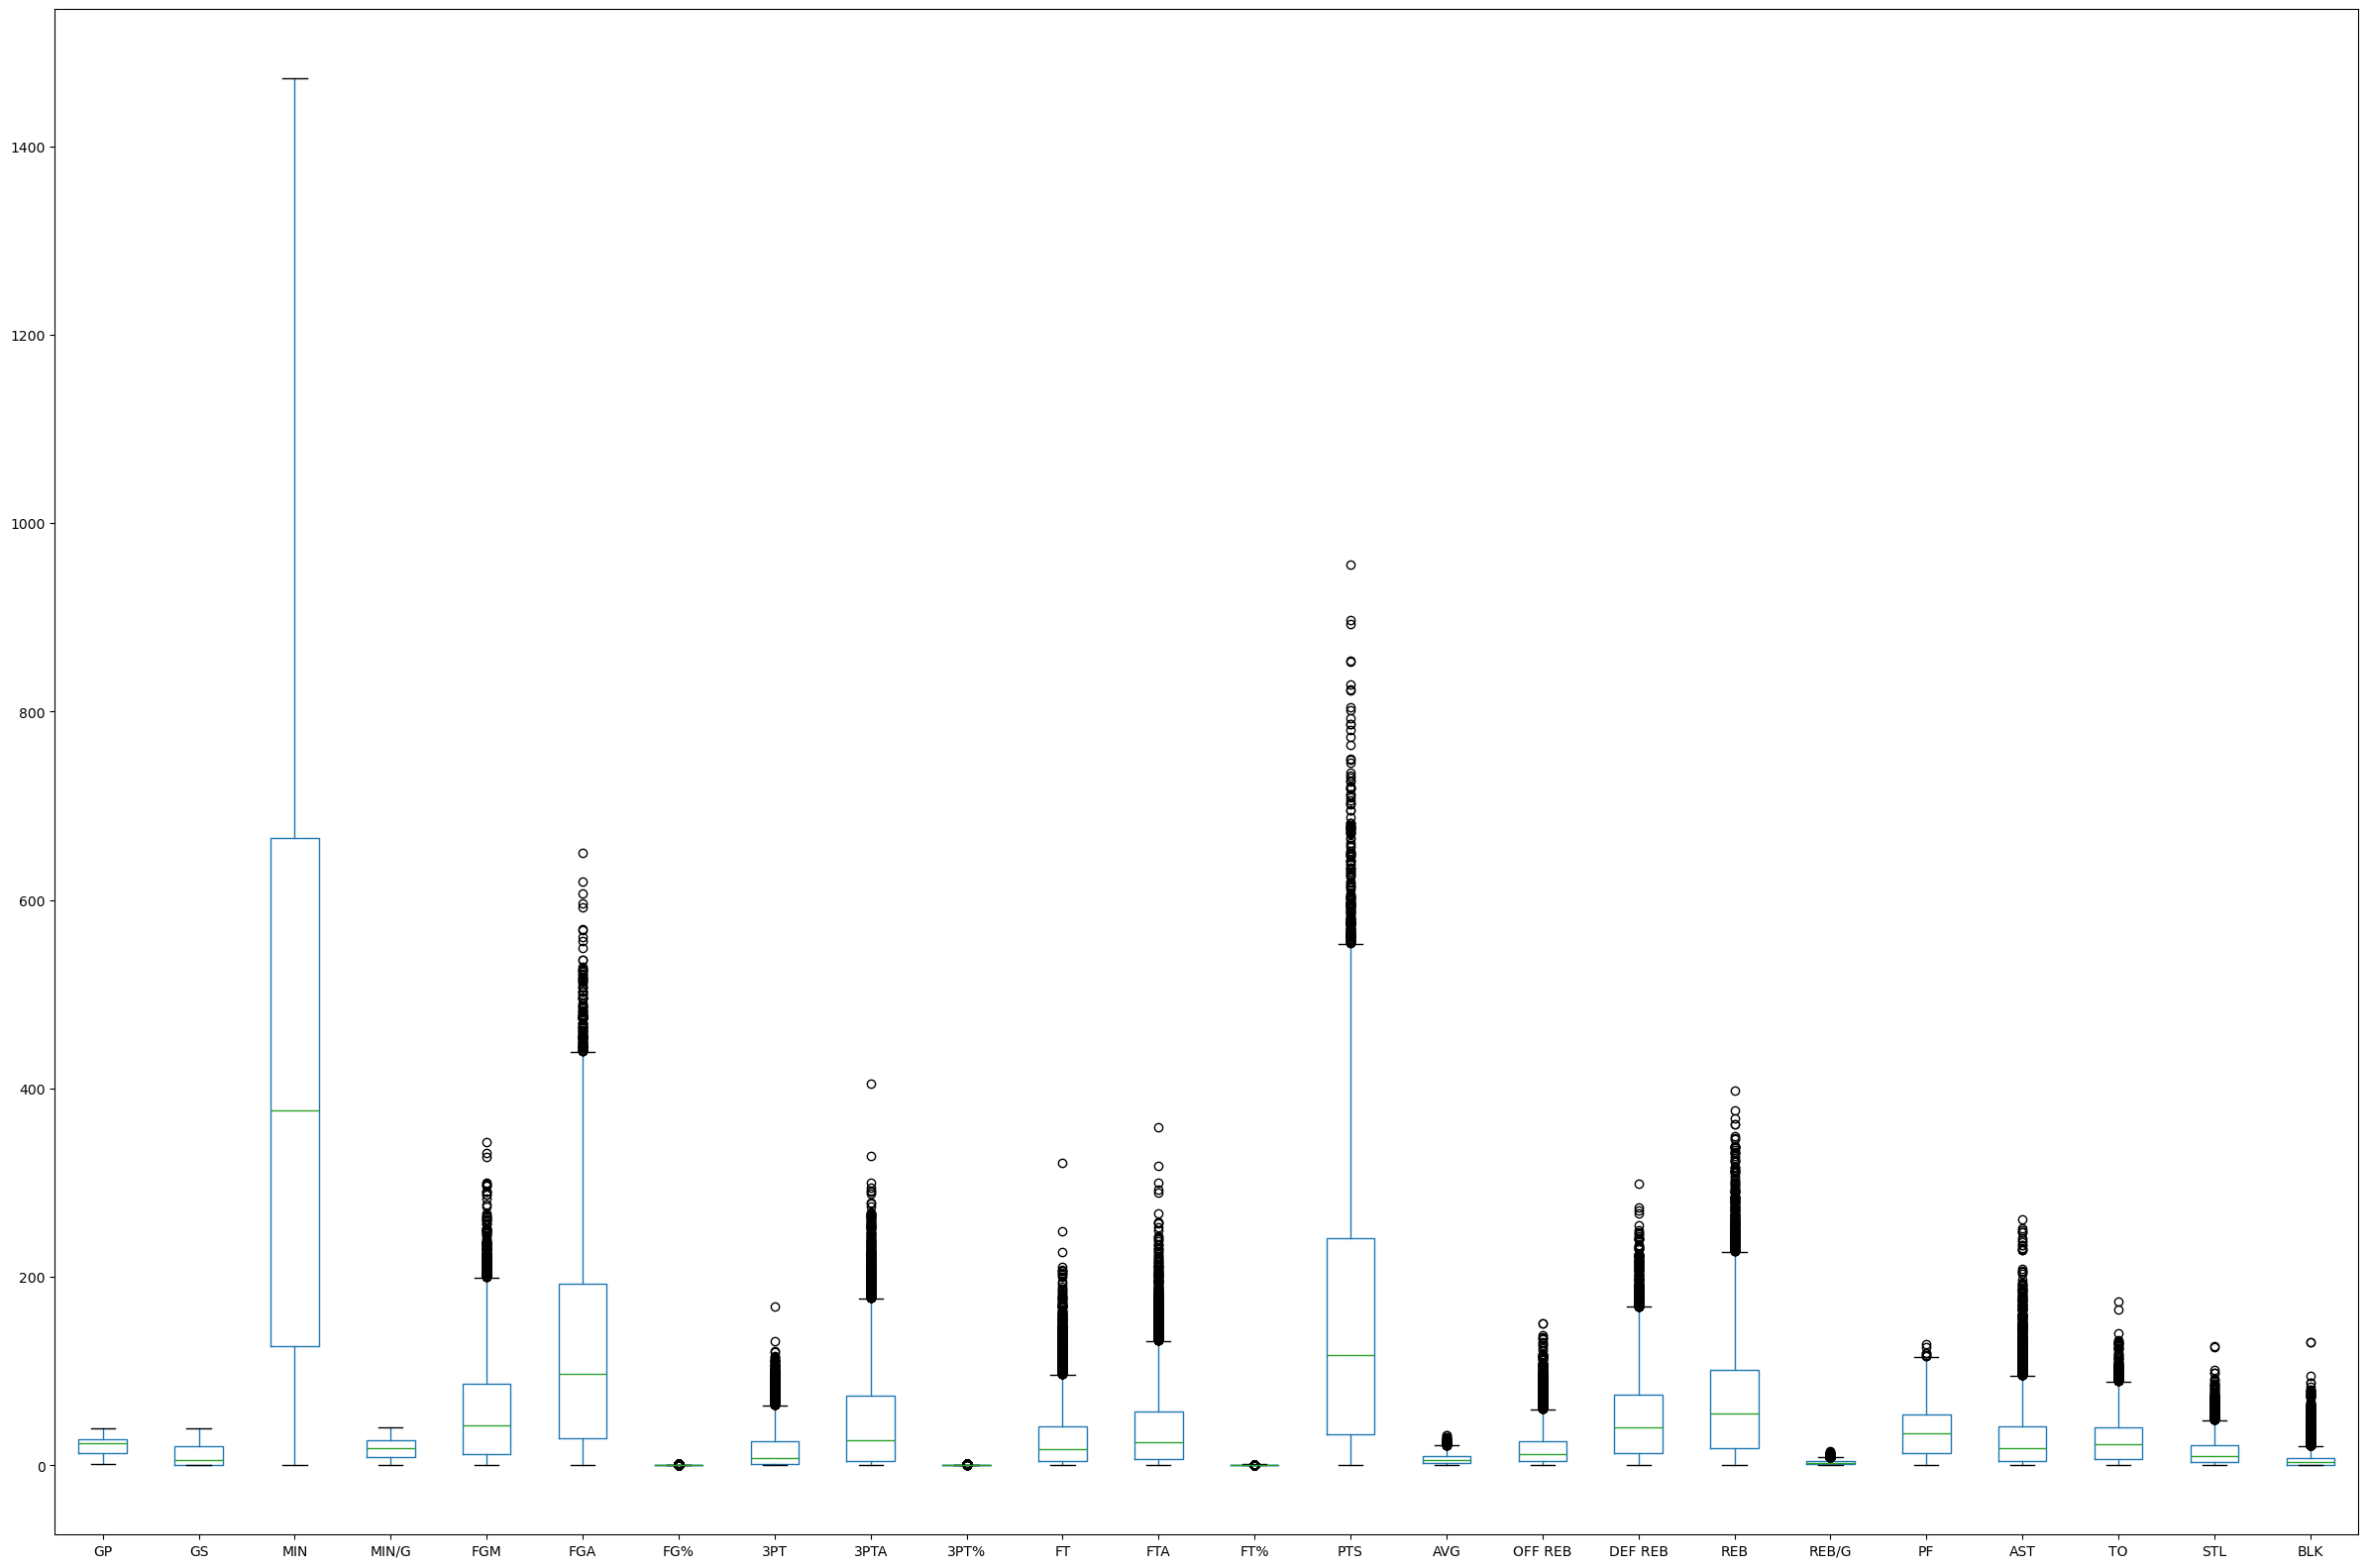

In [16]:
# plot the distributions of the continuous variables
plt.figure(figsize=(30, 20))
data_new.boxplot(column =list(data_new.columns[1:-3]), grid = False)

Now that we have an idea of what our data looks like, we will explore some of the relationships between the variables.

For example, let's visualize the relationship between 'MIN' (Minutes) and 'PTS' (Points) for each position type.

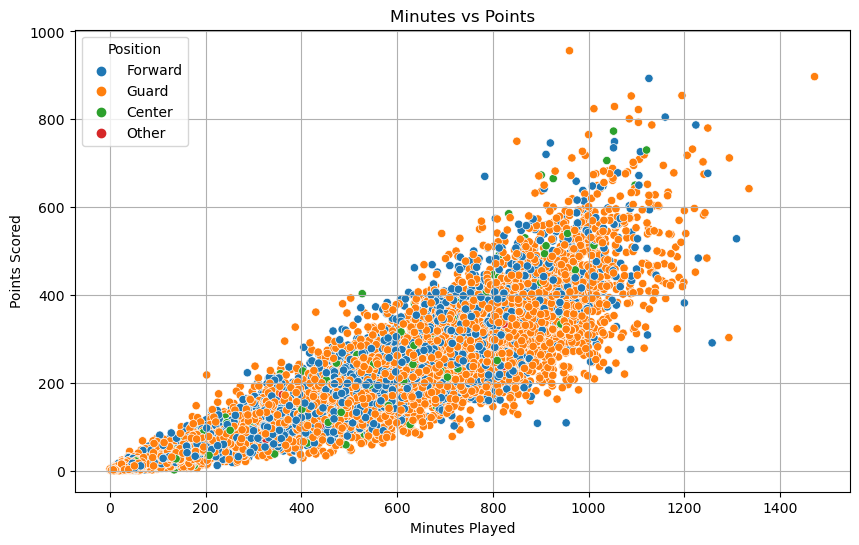

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='MIN', y='PTS', hue='Position')
plt.title('Minutes vs Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.grid(True)
plt.legend(title='Position')
plt.show()

We can also look at the distribution of the mean number of points for a given year.

/Users/seanjohn123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seanjohn123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


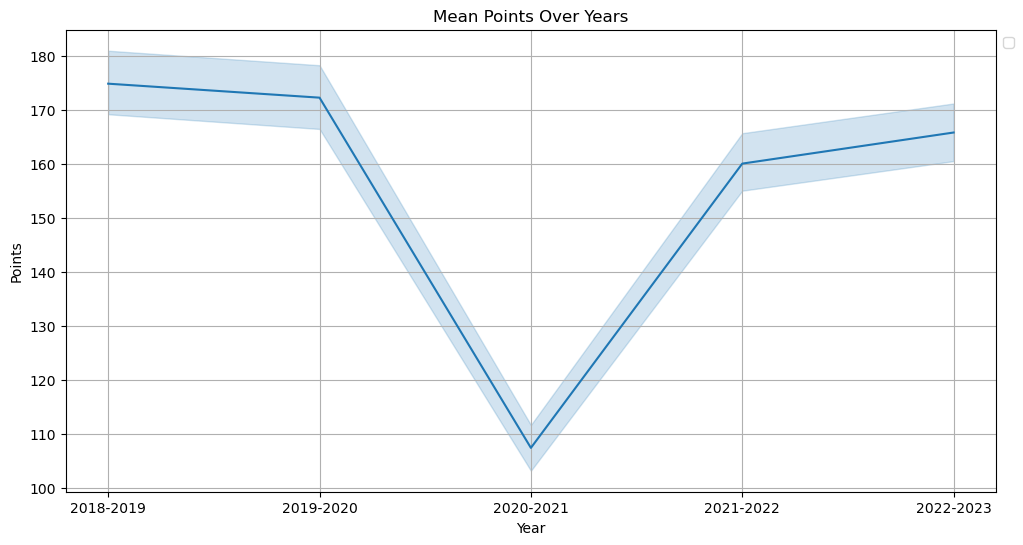

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_new, x='Year', y='PTS', estimator='mean')
plt.title('Mean Points Over Years')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [19]:
data_new.groupby("Year").count()["Player"]

Year
2018-2019    2585
2019-2020    2616
2020-2021    2458
2021-2022    2690
2022-2023    2679
Name: Player, dtype: int64

There seems to be an even distribution of years in our dataset. The number of observations for each year appear to be about the same. The dip in the number of points in 2020-2021 may be correlated with some other factor.

Speaking of correlations... we can take a look at how our variables relate to one another using a correlation matrix.

In [20]:
plt.figure(figsize=(20, 10))
corr_matrix = data_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Basketball Statistics')
plt.show()

ValueError: could not convert string to float: 'Andrija Blatancic'

<Figure size 2000x1000 with 0 Axes>

There seems to be large variability in the strengths of the correlations. One correlation that appears to be relatively high is PTS and FGA. Let's graph these variables against each other to see what their relationship looks like.

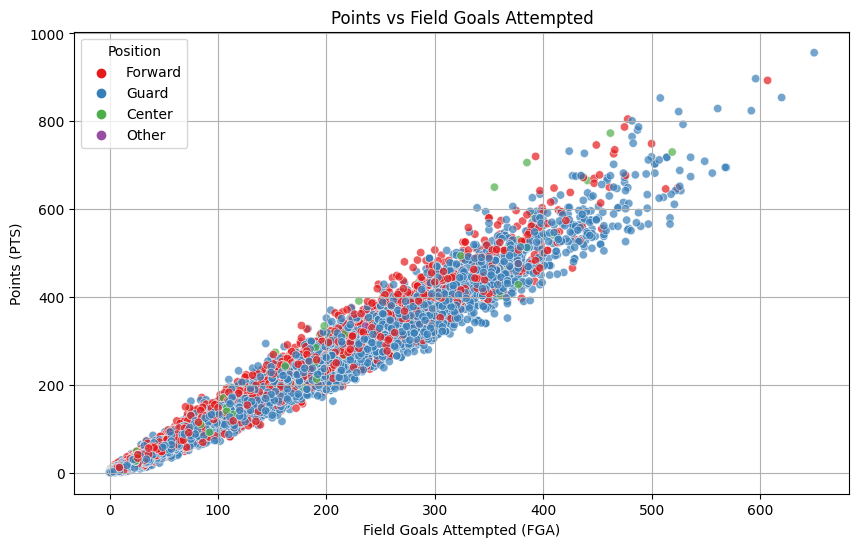

In [ ]:
# Create scatterplot for PTS (Points) and FGA (Field Goals Attempted)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='FGA', y='PTS', hue='Position', palette='Set1', alpha=0.7)
plt.title('Points vs Field Goals Attempted')
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Points (PTS)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

The relationship is strongly linear, with points increasing as FGA increases. This demonstrates the players' skills; they were able to obtain points for most of the field goal attempts they made.

Some other relationships that are commonly explored in basketball include FG% (Field Goals Percentage) and PTS (Points), AST (Assists) and TO (Turnovers), MIN (Minutes Played) and Rebounds (REB), Three-Point Attempts (3PTA) and Three-Point Percentage (3PT%), and Offensive Rebounds (OFF REB) and Defensive Rebounds (DEF REB). These relationships can provide insight into the performances of the players and the team.

Comparing FG% and PTS helps assess a player's scoring efficiency. A player might score a lot of points, but if they have a low field goal percentage, it could indicate inefficient shot selection or poor shooting accuracy.

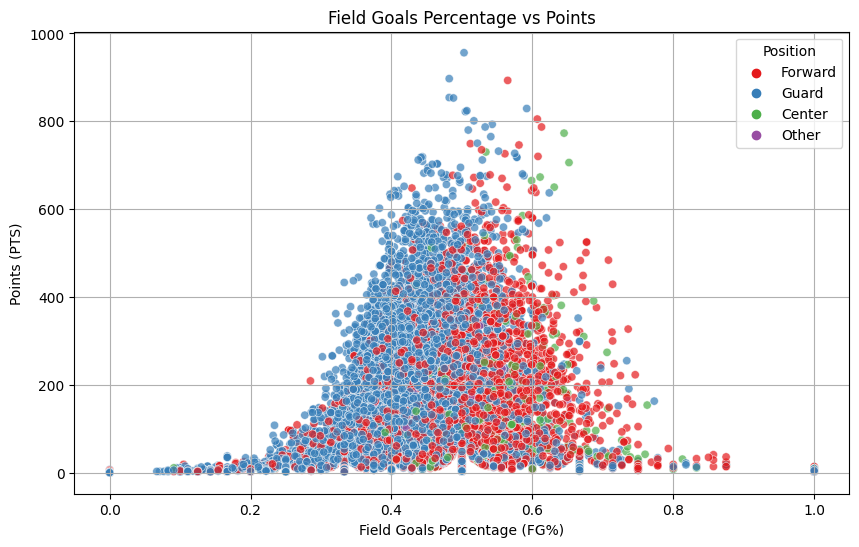

In [ ]:
# Create scatterplot for FG% (Field Goals Percentage) and PTS (Points)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='FG%', y='PTS', hue='Position', palette='Set1', alpha=0.7)
plt.title('Field Goals Percentage vs Points')
plt.xlabel('Field Goals Percentage (FG%)')
plt.ylabel('Points (PTS)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

This follows a normal distribution. The distribution seems to differ based on the position played, though, with forwards having higher FG% and Guards having lower overall. The position may play a role on how many field goals a player can attempt.

Comparing AST and TO evaluates a player's playmaking ability and decision-making on the court. A high number of assists suggests good passing and playmaking skills, while a high number of turnovers indicates potential mistakes and turnovers that could hurt the team.

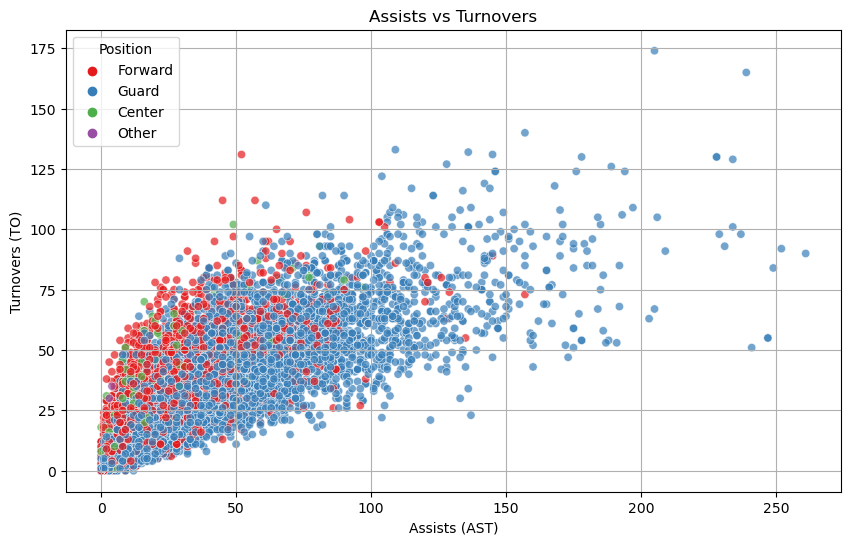

In [21]:
# Create scatterplot for AST (Assists) and TO (Turnovers)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='AST', y='TO', hue='Position', palette='Set1', alpha=0.7)
plt.title('Assists vs Turnovers')
plt.xlabel('Assists (AST)')
plt.ylabel('Turnovers (TO)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

As the number of assists increase, the number of turnovers also increase, but with more variation. Players tend to do higher assists within the range of 0 to 100, but lower turnovers, in range of 0 to 75. As is prefered, there are less players that do higher assists, but typically as the number of assists grows, so do turnovers. The stronger players would have higher assists and lower turnovers, which tend to be guards as well.

Comparing rebounds to minutes played helps assess a player's rebounding efficiency and effectiveness on the court. Players who grab a high number of rebounds in limited minutes are often considered impactful rebounders.

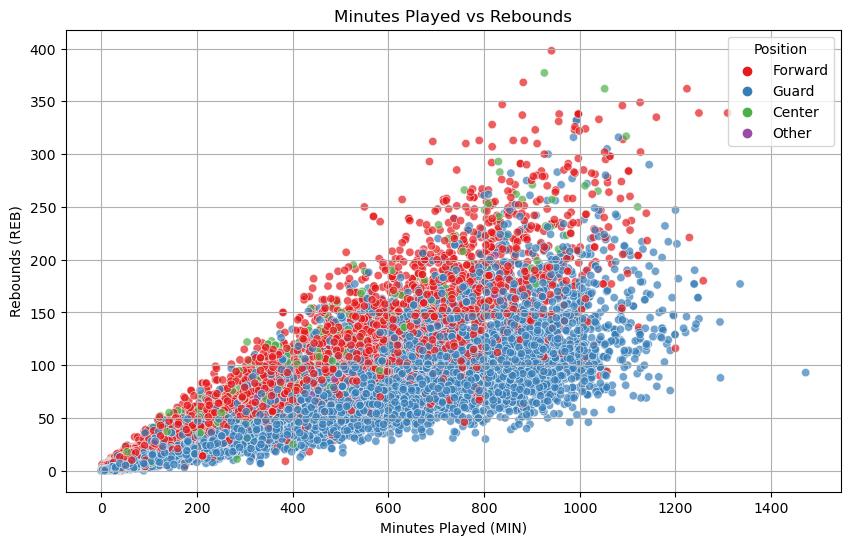

In [22]:
# Create scatterplot for MIN (Minutes Played) and Rebounds (REB)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='MIN', y='REB', hue='Position', palette='Set1', alpha=0.7)
plt.title('Minutes Played vs Rebounds')
plt.xlabel('Minutes Played (MIN)')
plt.ylabel('Rebounds (REB)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

Based on our description, the strongest players would be in the top part of the graph. These appear to be mostly forwards.

Three-Point Attempts (3PTA) and Three-Point Percentage (3PT%) evaluate a player's three-point shooting proficiency and volume. A player who attempts a high number of three-point shots while maintaining a high three-point percentage is considered a valuable three-point shooter.

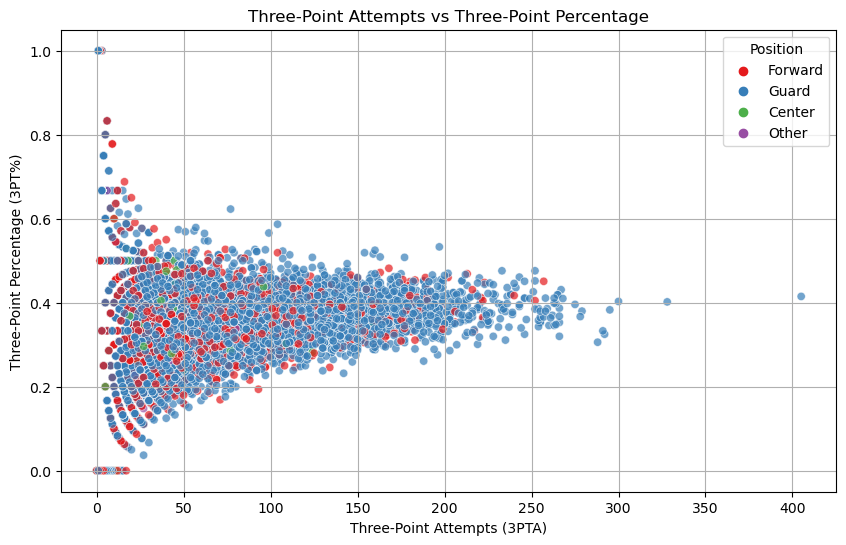

In [23]:
# Create scatterplot for Three-Point Attempts (3PTA) and Three-Point Percentage (3PT%)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='3PTA', y='3PT%', hue='Position', palette='Set1', alpha=0.7)
plt.title('Three-Point Attempts vs Three-Point Percentage')
plt.xlabel('Three-Point Attempts (3PTA)')
plt.ylabel('Three-Point Percentage (3PT%)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

There is more variation in 3PT% with lower 3PTA. Interestingly, as 3PTA increases, the 3PT% converges to 0.40. Perhaps this is the expected percentage of three-point throws from an average player.

Comparing offensive rebounds to defensive rebounds provides insights into a player's rebounding versatility and ability to secure possessions for their team on both ends of the court.

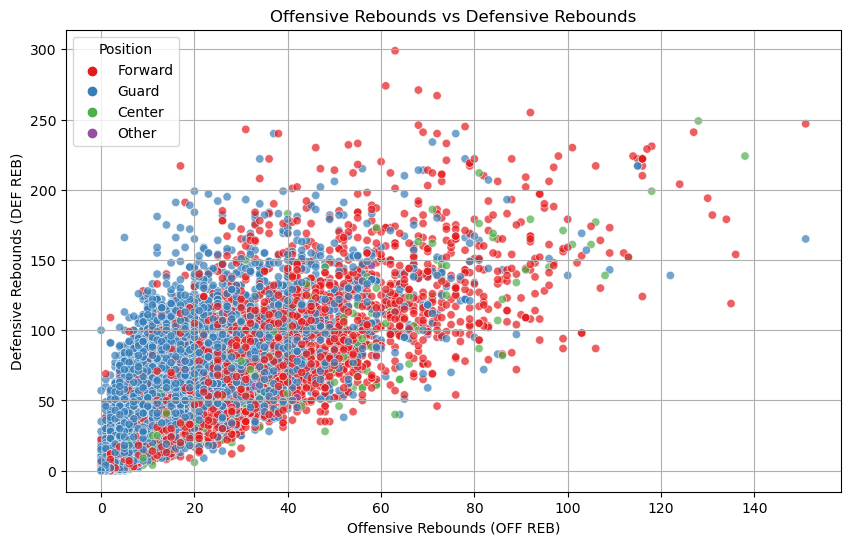

In [24]:
# Create scatterplot for Offensive Rebounds (OFF REB) and Defensive Rebounds (DEF REB)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_new, x='OFF REB', y='DEF REB', hue='Position', palette='Set1', alpha=0.7)
plt.title('Offensive Rebounds vs Defensive Rebounds')
plt.xlabel('Offensive Rebounds (OFF REB)')
plt.ylabel('Defensive Rebounds (DEF REB)')
plt.grid(True)
plt.legend(title='Position')
plt.show()

There is a lot of variability between these two variables. Most guards tend to be very stronger defensive rebound players but weaker offensive rebound players. Forwards seem to be the opposite, but with more variation.

Now that have explored our data and player performance, we want to make a predictive model that can forecast a player's performance using past statistics. We implement this model in the following section.

### Methodology

#### Feature Selection

In [86]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [87]:
df = pd.read_csv('data.csv')
df.shape #(15643,28)
df.head(20)

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,REB,REB/G,PF,AST,TO,STL,BLK,Position,Team,Year
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,202,8.8,68,24,61,21,6,F,Academy of Art University,2018-2019
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,40,1.4,51,22,34,13,1,G,Academy of Art University,2018-2019
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,3,0.2,7,6,1,2,0,G,Academy of Art University,2018-2019
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,86,3.7,56,28,28,22,2,G,Academy of Art University,2018-2019
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,36,1.3,62,91,62,26,1,G,Academy of Art University,2018-2019
5,Lake Del Mar,25,1,226,9.0,29,56,0.518,0,0,...,37,1.5,18,1,6,0,7,F/C,Academy of Art University,2018-2019
6,Nemanja Kovacevic,23,1,212,9.2,16,51,0.314,12,40,...,19,0.8,35,8,15,3,0,G,Academy of Art University,2018-2019
7,Victor Ruiz de Carranza,28,17,751,26.8,63,140,0.450,9,36,...,181,6.5,80,80,61,35,14,G,Academy of Art University,2018-2019
8,Kiel Long,28,16,538,19.2,22,75,0.293,8,41,...,57,2.0,48,32,13,7,1,G,Academy of Art University,2018-2019
9,Luka Radovic,14,4,124,8.9,11,32,0.344,0,0,...,20,1.4,17,1,15,4,4,F,Academy of Art University,2018-2019


In [88]:
# Data Cleaning 
df.isnull().sum()
# Check how many rows have most of their entries as zeros 
zeros_per_row = (df == 0).sum(axis=1)
# Check how many rows have more than half of the columns are zero (> 14 columns)
(zeros_per_row > 14).sum()
# Drop these rows 
df_cleaned = df.loc[zeros_per_row <= 14]
df_cleaned.shape #(13028, 28)

(13028, 28)

In [89]:
#final Similarity 
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings("ignore")

# Sample data (replace this with your actual dataset)
players_data = df_cleaned[df_cleaned.columns[:-3]]

# Function to calculate Euclidean distance
def calculate_distance(player1_stats, player2_stats):
    # Reshape the vectors to make sure they have the same shape
    player1_stats = player1_stats.reshape(1, -1)
    player2_stats = player2_stats.reshape(1, -1)
    # Calculate Euclidean distance
    distance = euclidean_distances(player1_stats, player2_stats)
    return distance[0][0]

# Function to find top 8 most similar players
def find_top_similar_players(target_player, all_players_data):
    distances = {}
    target_stats = all_players_data.loc[all_players_data["Player"] == target_player]
    
    for index, row in all_players_data.iterrows():
        if index != int(target_stats.index.values):
            distance = calculate_distance(target_stats.drop(columns="Player").values, row[1:].values)
            distances[index] = distance
    
    # Sort players by distance in ascending order
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])
    # Return top 8 most similar players
    return sorted_distances[:500]

# Example usage
target_player = 'Kai Tease'  # Change this to the player you want to find similarities for
top_similar_players_distance = find_top_similar_players(target_player, players_data)

# Print the top similar players
print(f"Top 1000 players similar to {target_player}:")
for player, distance in top_similar_players_distance:
    print(f"{player}: {distance}")

Top 1000 players similar to Kai Tease:
13651: 45.18969866020435
3600: 48.95984503652041
4473: 49.18506067903204
6928: 50.59844252543767
10777: 52.86572209854037
7214: 52.87172608304138
10242: 53.16260281438338
10259: 53.16260281438338
3236: 53.92738607609361
5190: 55.08024328196032
322: 57.73717582286173
5686: 58.111090120561705
11624: 58.40541699191935
13010: 58.50813360550788
11138: 58.51334721241042
12151: 58.52677160924072
10909: 59.000348507446596
5231: 60.48745598055878
9249: 60.54479729918955
14614: 61.13678809849341
2373: 61.25972263241118
15332: 61.3092727978402
13667: 61.72488397720862
2292: 61.72745176175775
6963: 61.954070350544
1277: 63.02232821786311
10659: 63.16757732413082
15524: 63.299129251514806
15536: 63.299129251514806
9130: 64.35614349073516
9819: 64.51343746848289
6507: 64.88004853574108
9318: 65.23192289055919
3266: 65.28812306997285
5186: 65.40393552378997
838: 65.45003906797884
6933: 65.84493755787231
8034: 65.9758563794359
5537: 66.11724245610979
7483: 66.237

In [90]:
df = players_data.loc[players_data.index.isin([t[0] for t in top_similar_players_distance] + 
                                         [int(players_data.loc[players_data["Player"] == target_player].index.values)])]

In [91]:
# Feature Selection 
# Initialization 
correlation = {}

# Loop through the columns in the DataFrame
for column in players_data.select_dtypes(include=[np.number]).columns:
    if column != 'PTS':
        correlation[column] = players_data['PTS'].corr(players_data[column])

# Print the correlation 
for col, corr in correlation.items():
    print(f"'PTS' with '{col}': {corr}")

'PTS' with 'GP': 0.6760081391459337
'PTS' with 'GS': 0.8371808158298376
'PTS' with 'MIN': 0.914892021242991
'PTS' with 'MIN/G': 0.8212179490002467
'PTS' with 'FGM': 0.9907751003623938
'PTS' with 'FGA': 0.9847533306766773
'PTS' with 'FG%': 0.21792677807621103
'PTS' with '3PT': 0.7292421393990796
'PTS' with '3PTA': 0.7381195973898966
'PTS' with '3PT%': 0.2734811482439248
'PTS' with 'FT': 0.9057113305553274
'PTS' with 'FTA': 0.8972080383699775
'PTS' with 'FT%': 0.3982309621011242
'PTS' with 'AVG': 0.9097102483601924
'PTS' with 'OFF REB': 0.6071003831021412
'PTS' with 'DEF REB': 0.8307058552882454
'PTS' with 'REB': 0.8006007632090971
'PTS' with 'REB/G': 0.6755551220838449
'PTS' with 'PF': 0.7618627899189441
'PTS' with 'AST': 0.7235099747478685
'PTS' with 'TO': 0.8529636288284806
'PTS' with 'STL': 0.7722760013924613
'PTS' with 'BLK': 0.4185940755398183


In [92]:
# Convert the correlation results dictionary to a pandas DataFrame
correlation_table = pd.DataFrame(list(correlation.items()), columns=['Metrics', 'Correlation with PTS'])
print(correlation_table)
# Sort the correlation score in descending value
correlation_table = correlation_table.sort_values(by='Correlation with PTS', ascending=False)
correlation_table

    Metrics  Correlation with PTS
0        GP              0.676008
1        GS              0.837181
2       MIN              0.914892
3     MIN/G              0.821218
4       FGM              0.990775
5       FGA              0.984753
6       FG%              0.217927
7       3PT              0.729242
8      3PTA              0.738120
9      3PT%              0.273481
10       FT              0.905711
11      FTA              0.897208
12      FT%              0.398231
13      AVG              0.909710
14  OFF REB              0.607100
15  DEF REB              0.830706
16      REB              0.800601
17    REB/G              0.675555
18       PF              0.761863
19      AST              0.723510
20       TO              0.852964
21      STL              0.772276
22      BLK              0.418594


,Metrics,Correlation with PTS
4,FGM,0.990775
5,FGA,0.984753
2,MIN,0.914892
13,AVG,0.909710
10,FT,0.905711
11,FTA,0.897208
20,TO,0.852964
1,GS,0.837181
15,DEF REB,0.830706
3,MIN/G,0.821218


In [93]:
correlation_table['Metrics'][0:10]

4         FGM
5         FGA
2         MIN
13        AVG
10         FT
11        FTA
20         TO
1          GS
15    DEF REB
3       MIN/G
Name: Metrics, dtype: object

In [95]:
#Filter only Top 10 Metrics and Player and PTS
df= df[['Player', 'FGM', 'FGA', 'MIN', 'AVG', 'FT', 'FTA', 'TO', 'GS', 'DEF REB', 'MIN/G', 'PTS']]
df

,Player,FGM,FGA,MIN,AVG,FT,FTA,TO,GS,DEF REB,MIN/G,PTS
18,Kai Tease,76,219,559,10.6,30,40,43,15,47,28.0,211
39,Stefan Milivojevic,64,154,487,16.4,54,61,29,12,28,37.5,213
81,Logan Longo,70,186,576,7.7,24,31,16,5,35,20.6,215
222,Derek Koch,69,172,597,8.5,19,29,33,22,80,27.1,187
284,Kani Glover,59,140,596,7.8,20,29,27,11,58,27.1,172
...,...,...,...,...,...,...,...,...,...,...,...,...
15524,Jonathan Hicklin,77,195,541,10.0,48,70,44,3,52,23.5,230
15536,Jonathan Hicklin,77,195,541,10.0,48,70,44,3,52,23.5,230
15586,Jacorie Archie,83,198,531,9.1,26,35,41,6,73,20.4,237
15616,Lenny Pradia,95,200,600,11.9,49,68,63,16,36,27.3,262


In [96]:
#Select features using the RandomForestClassifier's feature importances 
#the SelectFromModel method in scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import pandas as pd

X = df.drop(['Player','PTS'], axis=1)
y = df['PTS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Feature selection using RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=55)
clf.fit(X_train, y_train)

# Select features based on feature importances
sfm = SelectFromModel(clf)
sfm.fit(X_train, y_train)

# Get selected feature indices
selected_features = sfm.get_support(indices=True)

if len(selected_features) > 0:
    # Reduce X to the selected features
    X_train_selected = sfm.transform(X_train)
    X_test_selected = sfm.transform(X_test)

    # Train a new model using selected features
    clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_selected.fit(X_train_selected, y_train)

    # Make predictions and evaluate performance
    y_pred = clf_selected.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    print("Selected features:", X.columns[selected_features])
    print("Accuracy with selected features:", accuracy)
else:
    print("No features selected.")

Selected features: Index(['FGM', 'FGA', 'MIN', 'DEF REB'], dtype='object')
Accuracy with selected features: 0.13861386138613863


After using RandomForestClassifier to determine the best features to select, we acquired an accuracy of 13.9%. This low accuracy resulted in us changing our predictive model from multivariate linear regression and to a neural network model

#### Predictive Model

In [26]:
school_dict = pd.Series(schools['Conference'].values,index=schools['Name']).to_dict()
school_dict

{'Academy of Art University': 'Pacific West Conference',
 'Adams State University': 'Rocky Mountain Athletic Conference',
 'Adelphi University': 'Northeast-10 Conference',
 'Albany State University (Georgia)': 'Southern Intercol. Ath. Conf.',
 'Allen University': 'Southern Intercol. Ath. Conf.',
 'American International College': 'Northeast-10 Conference',
 'Anderson University (South Carolina)': 'South Atlantic Conference',
 'Angelo State University': 'Lone Star Conference',
 'Arkansas Tech University': 'Great American Conference',
 'Ashland University': 'Great Midwest Athletic Conference',
 'Assumption University': 'Northeast-10 Conference',
 'Auburn University at Montgomery': 'Gulf South Conference',
 'Augusta University': 'Peach Belt Conference',
 'Augustana University (South Dakota)': 'Northern Sun Intercollegiate Conference',
 'Azusa Pacific University': 'Pacific West Conference',
 'Barry University': 'Sunshine State Conference',
 'Barton College': 'Conference Carolinas',
 'Bella

In [27]:
d1_school_dict = pd.Series(d1_schools['Conference'].values,index=d1_schools['School']).to_dict()
d1_school_dict

{'Abilene Christian University': 'Western Athletic Conference',
 'Alabama A&M University': 'Southwestern Athletic Conference',
 'Alabama State University': 'Southwestern Athletic Conference',
 'Alcorn State University': 'Southwestern Athletic Conference',
 'American University': 'Patriot League',
 'Appalachian State University': 'Sun Belt Conference',
 'Arizona State University': 'Pacific-12 Conference',
 'Arkansas State University': 'Sun Belt Conference',
 'Auburn University': 'Southeastern Conference',
 'Austin Peay State University': 'ASUN Conference',
 'Ball State University': 'Mid-American Conference',
 'Baylor University': 'Big 12 Conference',
 'Bellarmine University': 'ASUN Conference',
 'Belmont University': 'Missouri Valley Conference',
 'Bethune-Cookman University': 'Southwestern Athletic Conference',
 'Boise State University': 'Mountain West Conference',
 'Boston College': 'Atlantic Coast Conference',
 'Boston University': 'Patriot League',
 'Bowling Green State University':

In [28]:
d1_schools['Conference'].unique()

array(['Western Athletic Conference', 'Southwestern Athletic Conference',
       'Patriot League', 'Sun Belt Conference', 'Pacific-12 Conference',
       'Southeastern Conference', 'ASUN Conference',
       'Mid-American Conference', 'Big 12 Conference',
       'Missouri Valley Conference', 'Mountain West Conference',
       'Atlantic Coast Conference', 'West Coast Conference', 'Ivy League',
       'American East Conference', 'Big East Conference',
       'Big Sky Conference', 'Big West Conference',
       'Big South Conference', 'Metro Atlantic Athletic Conference',
       'Northeast Conference', 'Ohio Valley Conference', 'Horizon League',
       'Colonial Athletic Association', 'Mid-Eastern Athletic Conference',
       'Atlantic 10 conference', 'Misouri Valley Conference',
       'Altantic 10 Conference', 'American Athletic Conference',
       'Southern Conference', 'Asun Conference',
       'The american athletic Conference', 'Atlantic Sun Conference',
       'Conference USA', 'Atla

To account for normalization of play across levels of play (Division 1 Basketball vs. Division 2 Basketball), we assigned a value from 0-2 to each conference included in the data that quantified the level of play for each conference (0 being the worst, 2 being the best). Values were assigned on a combination of intuition, domain knowledge, and some reference to metrics online that gave us a better sense of their true score.

In [29]:
conference_scores = {
    "Pacific West Conference": 0.75,
    "Rocky Mountain Athletic Conference": 0.75,
    "Northeast-10 Conference": 0.75,
    "Southern Intercol. Ath. Conf.": 0.75,
    "South Atlantic Conference": 0.75,
    "Lone Star Conference": 0.75,
    "Great American Conference": 0.75,
    "Great Midwest Athletic Conference": 0.75,
    "Gulf South Conference": 0.75,
    "Peach Belt Conference": 0.75,
    "Northern Sun Intercollegiate Conference": 0.75,
    "Sunshine State Conference": 0.75,
    "Conference Carolinas": 0.75,
    "Atlantic Sun Conference": 1,
    "Central Atlantic Collegiate Conference": 0.75,
    "Pennsylvania State Athletic Conference": 0.75,
    "Central Intercollegiate Athletic Association": 0.75,
    "California Collegiate Athletic Association": 0.75,
    "Great Northwest Athletic Conference": 0.75,
    "East Coast Conference": 0.75,
    "Mountain East Conference": 0.75,
    "Great Lakes Intercollegiate Athletic Conference": 0.75,
    "Great Lakes Valley Conference": 0.75,
    "Mid-America Intercollegiate Athletics Association": 0.75,
    "Northeast Conference": 0.75,
    "Ohio Valley Conference": 0.75,
    "American Southwest Conference": 0.75,
    "Western Athletic Conference": 1.1,
    "Southland Conference": 0.75,
    "Big West Conference": 1
}

In [30]:
d1_conference_scores = {
    "Atlantic Coast Conference": 2,
    "Southeastern Conference": 1.9,
    "Big 12 Conference": 1.9,
    "Big Ten Conference": 1.9,
    "Pacific-12 Conference": 1.8,
    "Big East Conference": 1.8,
    "American Athletic Conference": 1.5,
    "The american athletic Conference": 1.5,  # Exact spelling from original data
    "Mountain West Conference": 1.5,
    "Atlantic 10 Conference": 1.4,
    "Atlantic 10 conference": 1.4,  # Exact spelling from original data
    "Altantic 10 Conference": 1.4,  # Exact spelling from original data
    "Atlantic Ten Conference": 1.4,  # Exact spelling from original data
    "West Coast Conference": 1.4,
    "Missouri Valley Conference": 1.3,
    "Misouri Valley Conference": 1.3,  # Exact spelling from original data
    "Conference USA": 1.2,
    "Mid-American Conference": 1.1,
    "Sun Belt Conference": 1.1,
    "Sunbelt Conference": 1.1,  # Exact spelling from original data
    "Western Athletic Conference": 1.1,  # Also appeared in D2 data
    "Southern Conference": 1,
    "Ivy League": 1,
    "Horizon League": 1,
    "Metro Atlantic Athletic Conference": 1,
    "Colonial Athletic Association": 1,
    "Northeast Conference": 1,
    "Ohio Valley Conference": 1,
    "Patriot League": 1,
    "Big Sky Conference": 1,
    "Big West Conference": 1,
    "Big South Conference": 1,
    "America East Conference": 1,
    "American East Conference": 1,  # Exact spelling from original data
    "Atlantic Sun Conference": 1,
    "ASUN Conference": 1,
    "Asun Conference": 1,  # Exact spelling from original data
    "Summit League": 1,
    "The Summit League": 1,  # Exact spelling from original data
    "Summit League Conference": 1,  # This variation might be an over-specification
    "Southland Conference": 1,
    "Mid-Eastern Athletic Conference": 1,
    "Southwestern Athletic Conference": 1,
    "Division I-A Independents": 1,
    # Note for conferences listed as Division 2 in the provided data
    "Gulf South Conference": 1,  # D2 conference included here for completeness
    "Lone Star Conference": 1,  # D2 conference included here for completeness
}

In [31]:
data['Conference'] = data['Team'].map(school_dict)
data['Conference_Grade'] = data['Conference'].map(conference_scores).fillna(0.5)
data

/var/folders/cl/hszfjf1x4mq9nmbkr1_dtdv40000gn/T/ipykernel_70691/3301583854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Conference'] = data['Team'].map(school_dict)
/var/folders/cl/hszfjf1x4mq9nmbkr1_dtdv40000gn/T/ipykernel_70691/3301583854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Conference_Grade'] = data['Conference'].map(conference_scores).fillna(0.5)


,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,PF,AST,TO,STL,BLK,Position,Team,Year,Conference,Conference_Grade
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,68,24,61,21,6,F,Academy of Art University,2018-2019,Pacific West Conference,0.75
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,51,22,34,13,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,7,6,1,2,0,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,56,28,28,22,2,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,62,91,62,26,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15632,Josh Petteno,27,25,804,29.8,89,214,0.416,45,118,...,49,42,32,27,10,G,Young Harris College,2022-2023,Conference Carolinas,0.75
15633,Paul Hosey,29,24,389,13.4,45,82,0.549,11,29,...,35,11,26,2,6,F,Young Harris College,2022-2023,Conference Carolinas,0.75
15634,Nate Dunlop,29,25,738,25.4,86,209,0.411,55,141,...,41,37,16,13,6,F,Young Harris College,2022-2023,Conference Carolinas,0.75
15635,Brayden Baker,2,0,7,3.5,1,3,0.333,0,1,...,0,1,1,0,0,G,Young Harris College,2022-2023,Conference Carolinas,0.75


In [32]:
d1_data['Conference'] = d1_data['Team'].map(d1_school_dict)
d1_data['Conference_Grade'] = d1_data['Conference'].map(d1_conference_scores).fillna(1)
d1_data

/var/folders/cl/hszfjf1x4mq9nmbkr1_dtdv40000gn/T/ipykernel_70691/3577667694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_data['Conference'] = d1_data['Team'].map(d1_school_dict)
/var/folders/cl/hszfjf1x4mq9nmbkr1_dtdv40000gn/T/ipykernel_70691/3577667694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_data['Conference_Grade'] = d1_data['Conference'].map(d1_conference_scores).fillna(1)


,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,PF,AST,TO,STL,BLK,Position,Team,Year,Conference,Conference_Grade
0,Jaylen Franklin,1,1,30,30.0,5,9,0.556,0,1,...,3,1,4,1,0,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
1,Jaren Lewis,1,1,31,31.0,5,13,0.385,4,8,...,1,3,2,1,0,F,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
2,Damien Daniels,1,1,31,31.0,3,9,0.333,2,7,...,0,1,0,0,1,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
3,Payten Ricks,23,23,503,21.9,113,239,0.473,29,77,...,71,22,46,16,22,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
4,Tobias Cameron,33,8,504,15.3,25,61,0.410,16,36,...,47,20,18,14,1,G,Abilene Christian University,2018-2019,Western Athletic Conference,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,Jakov Kukic,16,1,124,7.8,11,19,0.579,0,0,...,15,3,7,4,2,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.0
11146,Ariel Bland,2,0,7,3.5,0,1,0.000,0,0,...,1,0,2,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.0
11147,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,18,6,8,3,1,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.0
11148,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,1,0,0,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.0


In [33]:
data = pd.concat([data, d1_data]).reset_index(drop=True)
data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,PF,AST,TO,STL,BLK,Position,Team,Year,Conference,Conference_Grade
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,68,24,61,21,6,F,Academy of Art University,2018-2019,Pacific West Conference,0.75
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,51,22,34,13,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,7,6,1,2,0,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,56,28,28,22,2,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,62,91,62,26,1,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,Jakov Kukic,16,1,124,7.8,11,19,0.579,0,0,...,15,3,7,4,2,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22327,Ariel Bland,2,0,7,3.5,0,1,0.000,0,0,...,1,0,2,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22328,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,18,6,8,3,1,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22329,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,1,0,0,0,0,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00


In [34]:
data['PPG'] = data['PTS'] / data['GP']
data['TO/G'] = data['TO'] / data['GP']
data['PF/G'] = data['PF'] / data['GP']
data['STL/G'] = data['STL'] / data['GP']
data['BLK/G'] = data['BLK'] / data['GP']
data['OFF_REB/G'] = data['OFF REB'] / data['GP']
data['DEF_REB/G'] = data['DEF REB'] / data['GP']
data['AST/G'] = data['AST'] / data['GP']
data = data[['Player', 'GP', 'GS', 'MIN', 'MIN/G', 'FGM', 'FGA', 'FG%', '3PT',
       '3PTA', '3PT%', 'FT', 'FTA', 'FT%', 'PTS', 'AVG', 'OFF REB', 'DEF REB', 'OFF_REB/G', 'DEF_REB/G',
       'REB', 'REB/G', 'PF', 'AST', 'TO', 'STL', 'BLK', 'PPG', 'AST/G', 'TO/G', 'PF/G', 'STL/G', 'BLK/G', 'Position', 'Team',
       'Year', 'Conference', 'Conference_Grade']]
data = data.fillna(0)
data

,Player,GP,GS,MIN,MIN/G,FGM,FGA,FG%,3PT,3PTA,...,AST/G,TO/G,PF/G,STL/G,BLK/G,Position,Team,Year,Conference,Conference_Grade
0,Andrija Blatancic,23,19,698,30.3,162,299,0.542,2,18,...,1.043478,2.652174,2.956522,0.913043,0.260870,F,Academy of Art University,2018-2019,Pacific West Conference,0.75
1,Dante Williams,28,1,409,14.6,52,109,0.477,6,18,...,0.785714,1.214286,1.821429,0.464286,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
2,Chance Maxwell,14,0,61,4.4,2,4,0.500,0,0,...,0.428571,0.071429,0.500000,0.142857,0.000000,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
3,Cole Morgan,23,9,373,16.2,35,96,0.365,2,8,...,1.217391,1.217391,2.434783,0.956522,0.086957,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
4,Cobe Williams,28,27,742,26.5,86,206,0.417,47,134,...,3.250000,2.214286,2.214286,0.928571,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,Jakov Kukic,16,1,124,7.8,11,19,0.579,0,0,...,0.187500,0.437500,0.937500,0.250000,0.125000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22327,Ariel Bland,2,0,7,3.5,0,1,0.000,0,0,...,0.000000,1.000000,0.500000,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22328,Matija Belic,23,0,153,6.7,14,32,0.438,2,11,...,0.260870,0.347826,0.782609,0.130435,0.043478,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.00
22329,David Pickles,3,0,5,1.7,1,2,0.500,0,1,...,0.000000,0.000000,0.333333,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00


In [35]:
data['Occurrence'] = data.groupby(['Player', 'Team']).cumcount() + 1
data = data[['Player', 'GP', 'GS', 'MIN/G', 'FG%', '3PT%', 'FT%',
       'OFF_REB/G', 'DEF_REB/G', 'REB/G', 'PPG', 'AST/G', 'TO/G', 'PF/G', 'STL/G', 'BLK/G', 'Position',
       'Team', 'Year', 'Conference', 'Conference_Grade', 'Occurrence']]
data

,Player,GP,GS,MIN/G,FG%,3PT%,FT%,OFF_REB/G,DEF_REB/G,REB/G,...,TO/G,PF/G,STL/G,BLK/G,Position,Team,Year,Conference,Conference_Grade,Occurrence
0,Andrija Blatancic,23,19,30.3,0.542,0.111,0.648,2.739130,6.043478,8.8,...,2.652174,2.956522,0.913043,0.260870,F,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
1,Dante Williams,28,1,14.6,0.477,0.333,0.656,0.178571,1.250000,1.4,...,1.214286,1.821429,0.464286,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
2,Chance Maxwell,14,0,4.4,0.500,0.000,0.000,0.142857,0.071429,0.2,...,0.071429,0.500000,0.142857,0.000000,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
3,Cole Morgan,23,9,16.2,0.365,0.250,0.656,1.260870,2.478261,3.7,...,1.217391,2.434783,0.956522,0.086957,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
4,Cobe Williams,28,27,26.5,0.417,0.351,0.778,0.321429,0.964286,1.3,...,2.214286,2.214286,0.928571,0.035714,G,Academy of Art University,2018-2019,Pacific West Conference,0.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,Jakov Kukic,16,1,7.8,0.579,0.000,0.619,1.250000,0.687500,1.9,...,0.437500,0.937500,0.250000,0.125000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,4
22327,Ariel Bland,2,0,3.5,0.000,0.000,0.000,0.000000,1.500000,1.5,...,1.000000,0.500000,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,1
22328,Matija Belic,23,0,6.7,0.438,0.182,0.455,0.217391,0.565217,0.8,...,0.347826,0.782609,0.130435,0.043478,G,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,1
22329,David Pickles,3,0,1.7,0.500,0.000,0.500,0.333333,0.000000,0.3,...,0.000000,0.333333,0.000000,0.000000,F,University of California – Santa Barbara,2022-2023,Big West Conference,1.00,2


This code is defining a Multilayer Perceptron model that has one input layer, three hidden layers, and one output layer. It is using ReLu activation functions between layers for non-linear transformations - used for mapping inputs to output predictions.

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )

    def forward(self, x):
        return self.network(x)

A pipeline for training and testing the model built above. In the preprocessing stage, the numerical features are standardized and the categorical features are put into a one-hot encoder. The train/test split is separated by the "2022-2023" season, wherein that season is set aside for the test data. Once turned into tensors, we found a batch size of 64 gave us the optimal amount of model generalization. Furthermore, we also found that our training loss was hitting a tapering off around the high teens, so we set our number of epochs to 20.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

losses = []
test_losses = []

models = {}
corrected_numerical_cols = ['GP', 'GS', 'MIN/G', 'FG%', '3PT%', 'FT%', 'PPG', 'REB/G', 'OFF_REB/G', 'DEF_REB/G', 'PF/G', 'AST/G', 'TO/G', 'STL/G', 'BLK/G']

features = ['Player', 'GP', 'GS', 'MIN/G', 'FG%', '3PT%', 'FT%', 'PPG', 'OFF_REB/G', 'DEF_REB/G', 'REB/G', 'AST/G', 'TO/G', 'PF/G', 'STL/G', 'BLK/G',
            'Position', 'Team', 'Conference', 'Conference_Grade', 'Occurrence']
target = 'GP'
zero_counts = data.apply(lambda row: (row == 0).sum(), axis=1)
data = data[zero_counts <= 10]
data = data.sort_values(by='Year').reset_index(drop=True)

for col in corrected_numerical_cols:
    features_copy = [val for val in features if val != col]
    X = data[features_copy]
    y = data[col]

    categorical_features = ['Player', 'Position', 'Team', 'Conference']
    data['Player'] = data['Player'].astype(str)
    data['Position'] = data['Position'].astype(str)
    data['Team'] = data['Team'].astype(str)
    data['Conference'] = data['Conference'].astype(str)

    train_data = data[data['Year'] != '2022-2023']
    test_data = data[data['Year'] == '2022-2023']

    X_train = train_data[features]
    y_train = train_data[col]
    X_test = test_data[features]
    y_test = test_data[col]

    numerical_features = [feature for feature in features if feature not in categorical_features]

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    preprocessor.fit(X_train)

    X_train_transformed = preprocessor.transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    X_train_transformed.shape, X_test_transformed.shape

    X_train_tensor = torch.tensor(X_train_transformed.toarray().astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32))
    X_test_tensor = torch.tensor(X_test_transformed.toarray().astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.astype(np.float32))

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = MLP(input_size=X_train_transformed.shape[1], output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            loss = running_loss/len(train_loader)
            losses.append(loss)
        print(f'Epoch {epoch+1}, Loss: {loss}, Column: {col}')

    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).squeeze()
        test_loss = criterion(predictions, y_test_tensor)
        test_losses.append(test_loss)
        print(f'Test Loss: {test_loss.item()}')
    models[col] = model

Epoch 1, Loss: 107.62123706675213, Column: GP
Epoch 2, Loss: 0.40824799233948, Column: GP
Epoch 3, Loss: 0.1429411179123034, Column: GP
Epoch 4, Loss: 0.08020449166705135, Column: GP
Epoch 5, Loss: 0.06448626350469262, Column: GP
Epoch 6, Loss: 0.06540195399340783, Column: GP
Epoch 7, Loss: 0.07552884092540231, Column: GP
Epoch 8, Loss: 0.09448009032670779, Column: GP
Epoch 9, Loss: 0.1078699656428044, Column: GP
Epoch 10, Loss: 0.11886340911493047, Column: GP
Epoch 11, Loss: 0.11658138992222211, Column: GP
Epoch 12, Loss: 0.10811112060403551, Column: GP
Epoch 13, Loss: 0.10451804124216997, Column: GP
Epoch 14, Loss: 0.10733364555160053, Column: GP
Epoch 15, Loss: 0.09431029401207698, Column: GP
Epoch 16, Loss: 0.09028772072767029, Column: GP
Epoch 17, Loss: 0.10122027845328091, Column: GP
Epoch 18, Loss: 0.09790750668305932, Column: GP
Epoch 19, Loss: 0.08977416160566207, Column: GP
Epoch 20, Loss: 0.08997373207550467, Column: GP
Test Loss: 0.23326309025287628
Epoch 1, Loss: 50.693491

In [109]:
test_losses = [t.item() for t in test_losses]

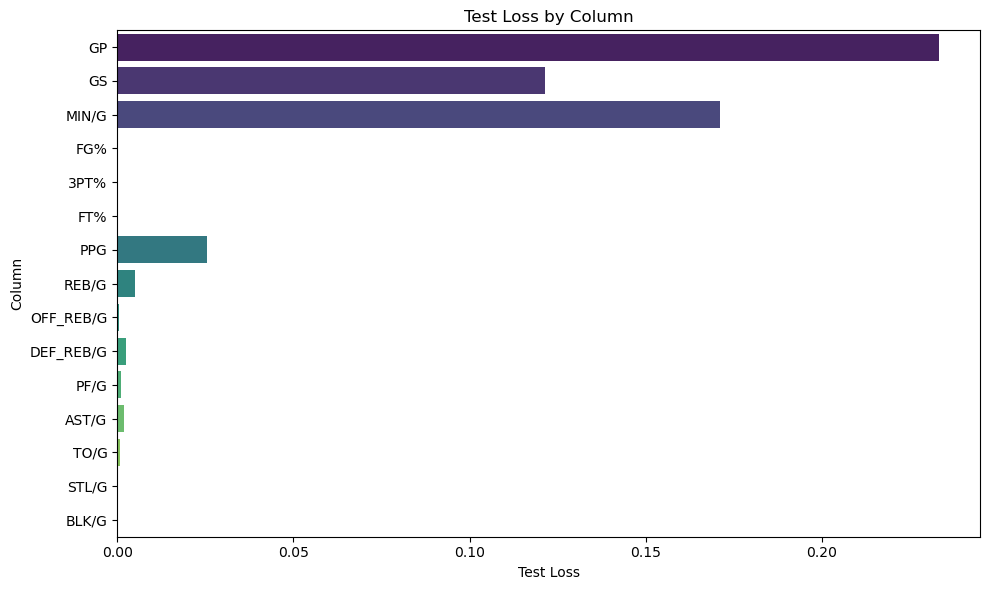

In [110]:
df_test_losses = pd.DataFrame({
    'Column': corrected_numerical_cols,
    'Test Loss': test_losses
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Test Loss', y='Column', data=df_test_losses, palette='viridis')
plt.title('Test Loss by Column')
plt.xlabel('Test Loss')
plt.ylabel('Column')
plt.tight_layout()
plt.show()

On run time, we made a few adjustments to ensure we were getting the most out of our model. Our Neural Network takes a many-to-one mapping of inputs to output, wherein a metric like 'GP' (Games Played) is predicted only by knowing all other features of a player (i.e. 'GS', 'MIN/G', 'FG%', '3PT%', etc. goes into the input, with 'GP' being the output - this being the case for every predicted variable). Upon inference, there is only five features we know beforehand: 'Player', 'Position', 'Team', 'Conference', and 'Conference_Grade' - meaning we had to find someway of determing these other features to make our prediction. Our solution was to get the top 150 most similar players to the previous year of a player's data (cosine similarity), filter that by players which had a subsequent year of data, get the median of each feature from this filtered group of players' data from the subsequent year upon inference (make-shift way of getting a rough estimate of the predicting player's other stats), and using these estimates to feed into the model. This code selects a random player from the test set and does such process.

In [102]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

X_test = X_test[X_test['Occurrence'] > 1].reset_index(drop=True)
random_index = np.random.randint(0, len(X_test))
print(f"Player Name: {X_test.iloc[random_index]['Player']}, School: {X_test.iloc[random_index]['Team']}")
for col, model in models.items():
    model.eval()

    selected_features = X_test.iloc[random_index:random_index+1].reset_index(drop=True)
    previous_year = X_train[(X_train['Player'] == selected_features['Player'][0]) & (X_train['Occurrence'] == (selected_features['Occurrence'][0] - 1))]
    all_numerical_data = X_train[corrected_numerical_cols]

    scaler = StandardScaler()
    scaled_all_data = scaler.fit_transform(all_numerical_data)
    scaled_player_data = scaler.transform(previous_year[corrected_numerical_cols])

    similarities = cosine_similarity(scaled_player_data, scaled_all_data)[0]
    top_indices = np.argsort(-similarities)[1:150+1]


    similar_players = X_train.iloc[top_indices]

    next_year = pd.DataFrame(columns=similar_players.columns)
    similar_players_copy = similar_players.copy().reset_index(drop=True)
    for i in range(len(similar_players)):
        player_next_year = X_train[
            (X_train['Player'] == similar_players_copy.iloc[i]['Player']) &
            (X_train['Team'] == similar_players_copy.iloc[i]['Team']) &
            (X_train['Occurrence'] == similar_players_copy.iloc[i]['Occurrence'] + 1)
        ]

        if not player_next_year.empty:
            if next_year.empty:
                next_year = pd.DataFrame(player_next_year)
            else:
                next_year = pd.concat([next_year, pd.DataFrame(player_next_year)], ignore_index=True)
    numeric_columns = next_year.select_dtypes(include='number')
    similar_players = numeric_columns.median()
    similar_players_df = similar_players.to_frame().transpose()
    similar_players_df.reset_index(drop=True, inplace=True)

    previous_year_copy = previous_year.copy().reset_index(drop=True)

    similar_players_df['Player'] = previous_year_copy.loc[0, 'Player']
    similar_players_df['Position'] = previous_year_copy.loc[0, 'Position']
    similar_players_df['Team'] = previous_year_copy.loc[0, 'Team']
    similar_players_df['Conference'] = previous_year_copy.loc[0, 'Conference']
    similar_players_df['Conference_Grade'] = previous_year_copy.loc[0, 'Conference_Grade']
    
    selected_features_transformed = preprocessor.transform(similar_players_df)

    selected_features_tensor = torch.tensor(selected_features_transformed.toarray().astype(np.float32))
    with torch.no_grad():
        prediction = model(selected_features_tensor).item()
        if prediction < 0:
            prediction = 0
    print(f"Predicted '{col}' for the selected instance: {prediction}")
    actual_value = X_test.iloc[random_index][col]
    print(f"Actual '{col}' for the selected instance: {actual_value}")

Player Name: Mykel Derring, School: Merrimack College
Predicted 'GP' for the selected instance: 22.989931106567383
Actual 'GP' for the selected instance: 18
Predicted 'GS' for the selected instance: 12.519083976745605
Actual 'GS' for the selected instance: 18
Predicted 'MIN/G' for the selected instance: 22.83540153503418
Actual 'MIN/G' for the selected instance: 22.7
Predicted 'FG%' for the selected instance: 0.3808627128601074
Actual 'FG%' for the selected instance: 0.349
Predicted '3PT%' for the selected instance: 0.32822322845458984
Actual '3PT%' for the selected instance: 0.368
Predicted 'FT%' for the selected instance: 0.7974409461021423
Actual 'FT%' for the selected instance: 0.5
Predicted 'PPG' for the selected instance: 6.116018295288086
Actual 'PPG' for the selected instance: 4.833333333333333
Predicted 'REB/G' for the selected instance: 1.8688849210739136
Actual 'REB/G' for the selected instance: 1.6
Predicted 'OFF_REB/G' for the selected instance: 0.3254164159297943
Actual '